## Import necessary libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv(r"C:\Users\vchan\OneDrive\Desktop\AI_DATA_ANALYSIS\ai_financial_market_daily_realistic_synthetic.csv")
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09
...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22


### Basic info of dataset

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


### Converting data column in data-time (dtype)


In [65]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  object        
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Event                233 non-null    object        
 6   Stock_Impact_%       10959 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 599.4+ KB


### Checking Dataset

In [66]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


### Checking the type of companines

In [67]:
df['Company'].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

### Creating year column for ease

In [68]:
df['Year'] = df['Date'].dt.year

In [69]:
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015
...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66,2024
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57,2024
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52,2024
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22,2024


### How much amount companies spent on R&D?

In [70]:
total_spent = df.groupby('Company')['R&D_Spending_USD_Mn'].sum()/1000

In [71]:
print(f"The amount spent by companies in Billion($) is:\n{total_spent}")

The amount spent by companies in Billion($) is:
Company
Google    423.34114
Meta      264.53307
OpenAI     26.48277
Name: R&D_Spending_USD_Mn, dtype: float64


### Graphical representation of following

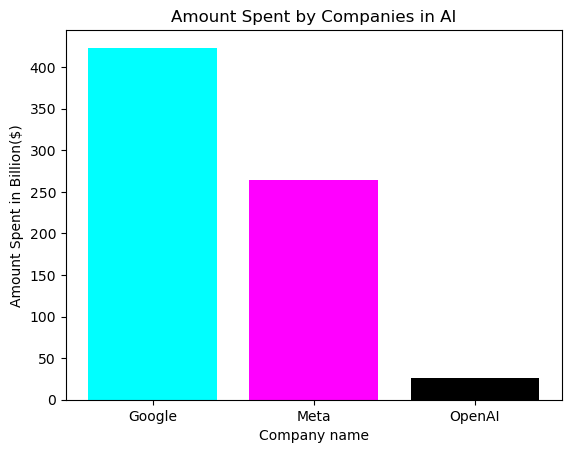

In [72]:
plt.bar(total_spent.index, total_spent.values, color = ['cyan','magenta','black'])
plt.title("Amount Spent by Companies in AI")
plt.xlabel("Company name")
plt.ylabel("Amount Spent in Billion($)")
plt.show()

### Revenue Earned By Companies

In [73]:
revenue_earned = df.groupby("Company")["AI_Revenue_USD_Mn"].sum()/1000


In [74]:
print(f"Revenue Earned by Companies in Billion($) is:\n{revenue_earned}")

Revenue Earned by Companies in Billion($) is:
Company
Google    284.49838
Meta      189.62182
OpenAI      9.46289
Name: AI_Revenue_USD_Mn, dtype: float64


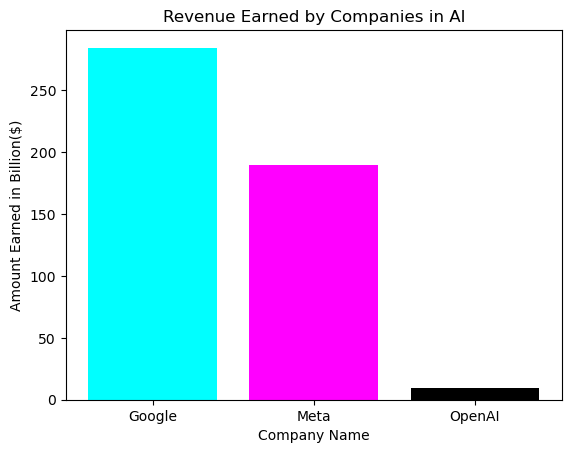

In [75]:
plt.bar(revenue_earned.index,revenue_earned.values, color = ['cyan','magenta','black'])
plt.title("Revenue Earned by Companies in AI")
plt.xlabel("Company Name")
plt.ylabel("Amount Earned in Billion($)")
plt.show()

### Bar Plots for Revenue and Expenditure

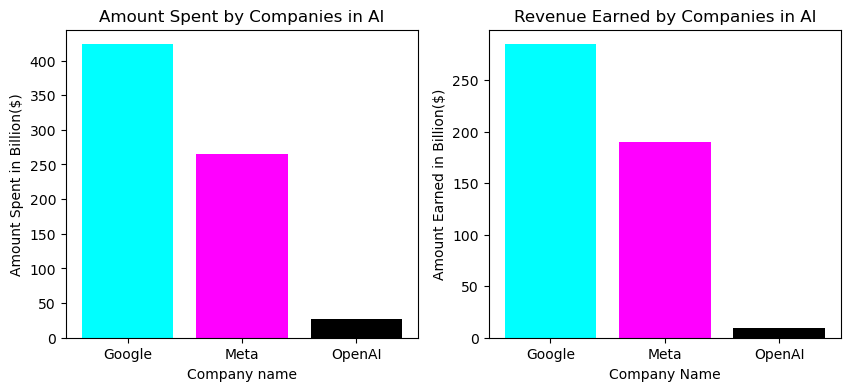

In [76]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.bar(total_spent.index, total_spent.values, color = ['cyan','magenta','black'])
plt.title("Amount Spent by Companies in AI")
plt.xlabel("Company name")
plt.ylabel("Amount Spent in Billion($)")

plt.subplot(1,2,2)
plt.bar(revenue_earned.index,revenue_earned.values, color = ['cyan','magenta','black'])
plt.title("Revenue Earned by Companies in AI")
plt.xlabel("Company Name")
plt.ylabel("Amount Earned in Billion($)")

plt.show()

### DateWise Impact on Stock

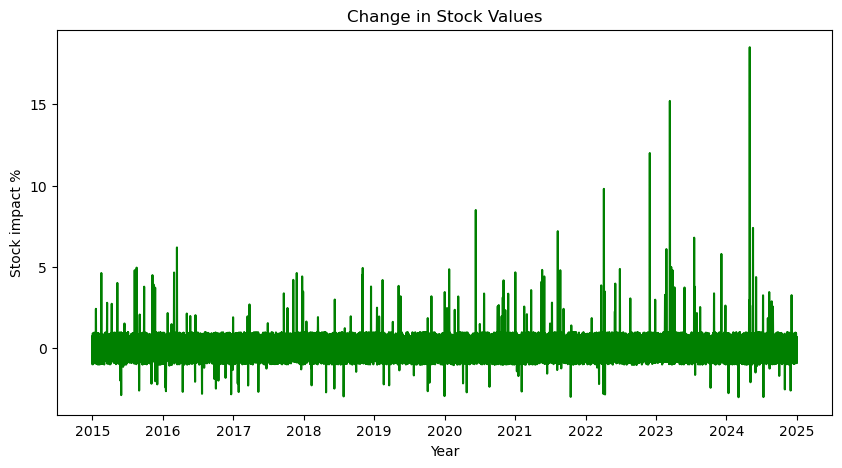

In [77]:
plt.figure(figsize = (10,5))
plt.title("Change in Stock Values")
plt.xlabel("Year")
plt.ylabel("Stock impact %")
plt.plot(df['Date'], df['Stock_Impact_%'], color = 'g')
plt.show()

#### Seperating companies with variable

In [78]:
data_openai = df [ df['Company'] == 'OpenAI']
data_openai

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015
...,...,...,...,...,...,...,...,...
3648,2024-12-27,OpenAI,10.06,4.71,370.69,NaN,0.93,2024
3649,2024-12-28,OpenAI,9.67,5.32,432.15,NaN,-0.25,2024
3650,2024-12-29,OpenAI,9.17,5.46,445.74,NaN,0.47,2024
3651,2024-12-30,OpenAI,10.36,6.31,530.88,NaN,0.69,2024


In [79]:
data_google = df [ df['Company'] == 'Google']
data_google

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3653,2015-01-01,Google,79.89,30.19,0.64,NaN,-0.02,2015
3654,2015-01-02,Google,78.99,30.44,1.47,NaN,-0.98,2015
3655,2015-01-03,Google,79.20,30.46,1.53,NaN,0.78,2015
3656,2015-01-04,Google,79.59,30.55,1.82,NaN,-0.41,2015
3657,2015-01-05,Google,81.50,30.59,1.97,NaN,-0.78,2015
...,...,...,...,...,...,...,...,...
7301,2024-12-27,Google,162.16,155.36,417.88,NaN,-0.46,2024
7302,2024-12-28,Google,159.69,154.47,414.89,NaN,-0.48,2024
7303,2024-12-29,Google,161.69,154.59,415.31,NaN,0.72,2024
7304,2024-12-30,Google,158.48,155.05,416.84,NaN,-0.17,2024


In [80]:
data_meta = df[df['Company'] == 'Meta' ]
data_meta

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
7306,2015-01-01,Meta,50.39,18.95,-5.23,NaN,-0.42,2015
7307,2015-01-02,Meta,49.80,19.77,-1.16,NaN,0.63,2015
7308,2015-01-03,Meta,49.09,19.96,-0.21,NaN,0.73,2015
7309,2015-01-04,Meta,50.66,20.48,2.38,NaN,-0.26,2015
7310,2015-01-05,Meta,51.36,19.84,-0.80,NaN,-0.37,2015
...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66,2024
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57,2024
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52,2024
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22,2024


### Impact on stock Company wise

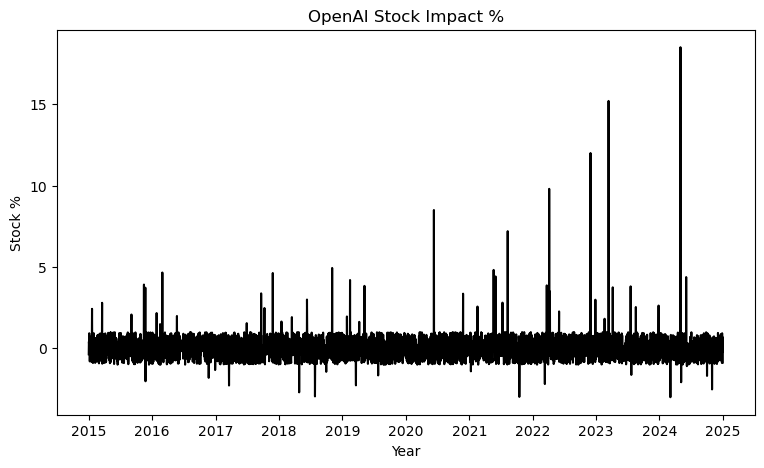

In [81]:
plt.figure(figsize = (9,5))
plt.plot(data_openai['Date'],data_openai['Stock_Impact_%'], color = 'black')
plt.title("OpenAI Stock Impact %")
plt.xlabel("Year")
plt.ylabel("Stock %")
plt.show()

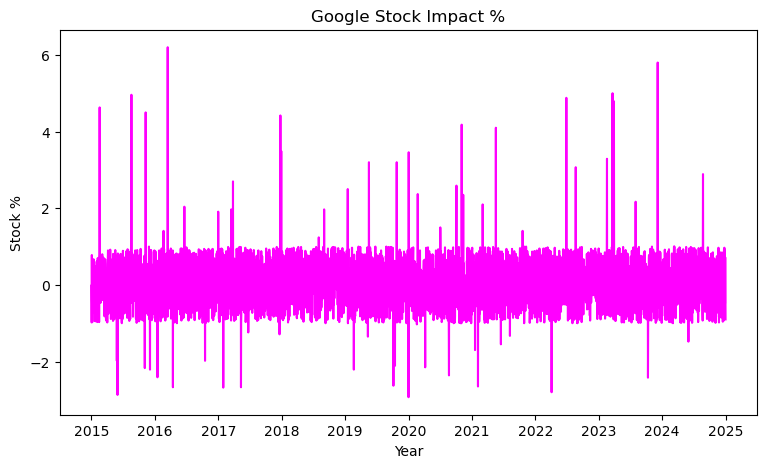

In [82]:
plt.figure(figsize = (9,5))
plt.plot(data_google['Date'],data_google['Stock_Impact_%'], color = 'magenta')
plt.title("Google Stock Impact %")
plt.xlabel("Year")
plt.ylabel("Stock %")
plt.show()

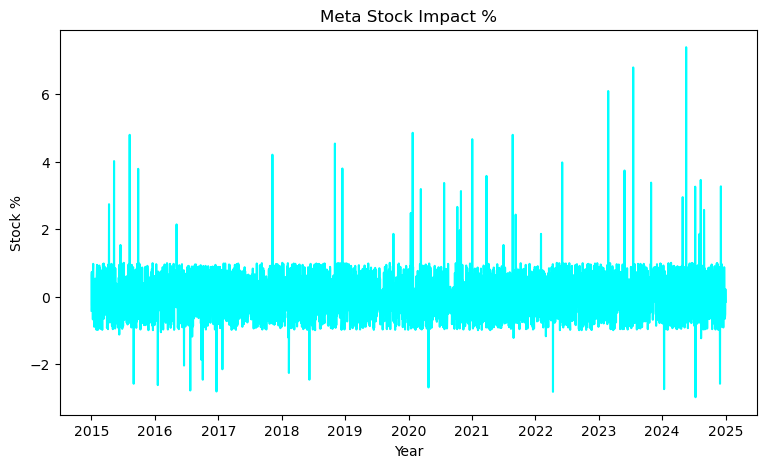

In [83]:
plt.figure(figsize = (9,5))
plt.plot(data_meta['Date'],data_meta['Stock_Impact_%'], color = 'cyan')
plt.title("Meta Stock Impact %")
plt.xlabel("Year")
plt.ylabel("Stock %")
plt.show()

### Events when Maximum Stock Impact was observed

In [84]:
#Openai
data_openai.sort_values( by = 'Stock_Impact_%' , ascending = False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3408,2024-05-01,OpenAI,10.91,5.34,434.27,GPT-5 release (predicted),18.50,2024
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.20,2023
2890,2022-11-30,OpenAI,10.60,3.18,217.72,ChatGPT (GPT-3.5) launch,12.00,2022
2652,2022-04-06,OpenAI,9.24,3.48,247.93,DALL·E 2 release,9.80,2022
1988,2020-06-11,OpenAI,5.90,2.62,161.56,GPT-3 release,8.50,2020
...,...,...,...,...,...,...,...,...
3590,2024-10-30,OpenAI,11.05,5.27,427.50,AI-powered search update,-2.52,2024
1212,2018-04-27,OpenAI,5.38,1.76,76.47,AI ethics policy update,-2.70,2018
1303,2018-07-27,OpenAI,7.44,0.97,-2.63,AI-powered search update,-2.95,2018
2480,2021-10-16,OpenAI,8.39,2.78,178.28,AI Ads Optimization upgrade,-2.98,2021


In [85]:
#Google
data_google.sort_values('Stock_Impact_%',ascending = False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
4092,2016-03-15,Google,84.56,36.22,20.73,AlphaGo beats Lee Sedol,6.20,2016
6914,2023-12-06,Google,146.59,129.17,330.55,Gemini AI release,5.80,2023
6654,2023-03-21,Google,149.34,129.76,332.53,Bard chatbot launch,5.00,2023
3883,2015-08-19,Google,79.27,30.89,2.98,AI partnership deal,4.96,2015
6388,2022-06-28,Google,137.71,107.96,259.85,AI ethics policy update,4.88,2022
...,...,...,...,...,...,...,...,...
4122,2016-04-14,Google,87.19,36.08,20.28,AI partnership deal,-2.67,2016
4412,2017-01-29,Google,92.21,43.25,44.17,AI Ads Optimization upgrade,-2.68,2017
6303,2022-04-04,Google,138.00,106.81,256.04,AI Video Recommendation upgrade,-2.80,2022
3803,2015-05-31,Google,81.14,29.30,-2.32,Cloud AI launch,-2.87,2015


In [86]:
#Meta
data_meta.sort_values('Stock_Impact_%',ascending = False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
10731,2024-05-18,Meta,103.64,103.05,415.23,LLaMA 3 release (predicted),7.40,2024
10426,2023-07-18,Meta,92.44,85.67,328.37,LLaMA 2 release,6.80,2023
10282,2023-02-24,Meta,93.71,86.98,334.89,LLaMA 1 release,6.10,2023
9156,2020-01-25,Meta,72.73,49.10,145.49,Cloud AI launch,4.86,2020
7526,2015-08-09,Meta,48.97,19.95,-0.27,AI Video Recommendation upgrade,4.80,2015
...,...,...,...,...,...,...,...,...
10604,2024-01-12,Meta,99.37,104.28,421.42,AI Video Recommendation upgrade,-2.75,2024
7875,2016-07-23,Meta,53.76,23.97,19.83,AI-powered search update,-2.79,2016
8026,2016-12-21,Meta,53.18,23.42,17.11,AI-powered search update,-2.82,2016
9964,2022-04-12,Meta,84.90,71.99,259.95,AI ethics policy update,-2.83,2022


### AI Revenue Growth of Companies

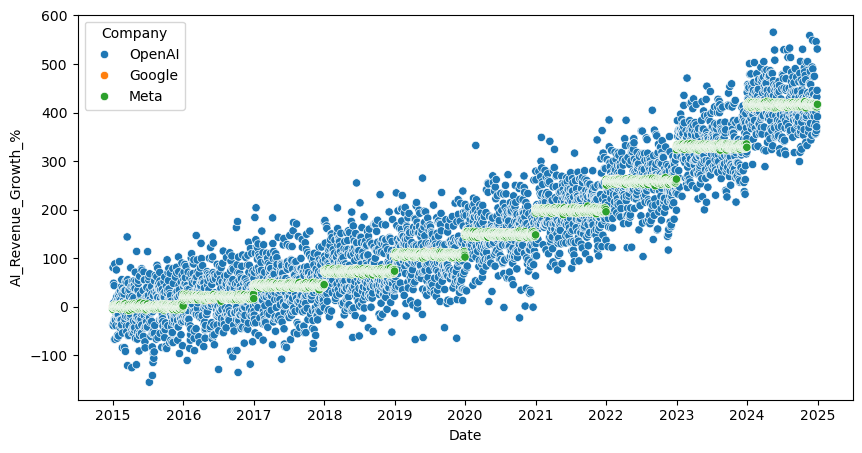

In [87]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='Date', y='AI_Revenue_Growth_%', data=df, hue='Company')

plt.show()

In [88]:
df.sort_values('AI_Revenue_Growth_%', ascending = False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3423,2024-05-16,OpenAI,8.47,6.65,565.50,NaN,0.51,2024
3612,2024-11-21,OpenAI,10.16,6.59,558.70,NaN,0.63,2024
3627,2024-12-06,OpenAI,8.51,6.49,548.83,NaN,-0.15,2024
3645,2024-12-24,OpenAI,8.79,6.46,546.07,NaN,0.45,2024
3508,2024-08-09,OpenAI,9.92,6.33,532.86,NaN,0.77,2024
...,...,...,...,...,...,...,...,...
98,2015-04-09,OpenAI,4.80,-0.25,-125.50,NaN,-0.56,2015
548,2016-07-02,OpenAI,5.19,-0.29,-129.11,NaN,-0.31,2016
649,2016-10-11,OpenAI,5.37,-0.35,-135.31,NaN,0.12,2016
205,2015-07-25,OpenAI,5.23,-0.42,-141.61,NaN,-0.62,2015


### Year on Year Growth of Companies

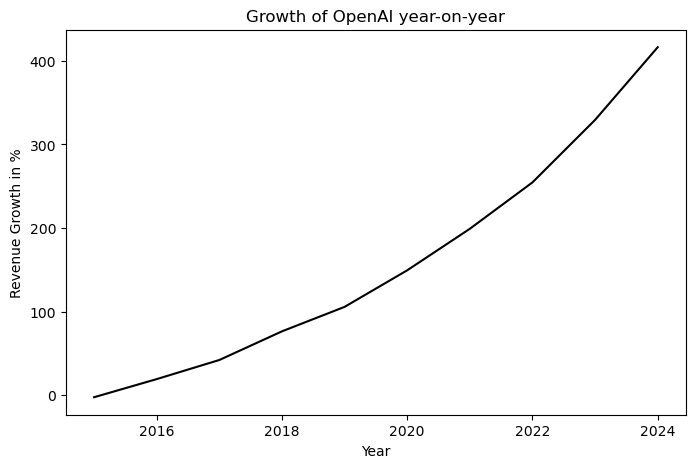

In [89]:
#openai
plt.figure(figsize = (8,5))
growth_openai = data_openai.groupby('Year')['AI_Revenue_Growth_%'].mean()
plt.title("Growth of OpenAI year-on-year")
plt.xlabel("Year")
plt.ylabel("Revenue Growth in %")
plt.plot(growth_openai,color = 'black')
plt.show()

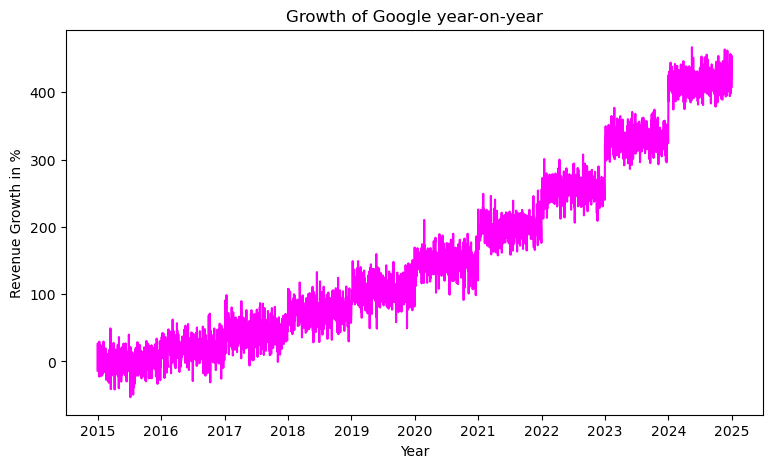

In [90]:
#Google
plt.figure(figsize = (9,5))
growth_google = df.groupby('Date')['AI_Revenue_Growth_%'].mean()
plt.title("Growth of Google year-on-year")
plt.xlabel("Year")
plt.ylabel("Revenue Growth in %")
plt.plot(growth_google, color = 'magenta')
plt.show()

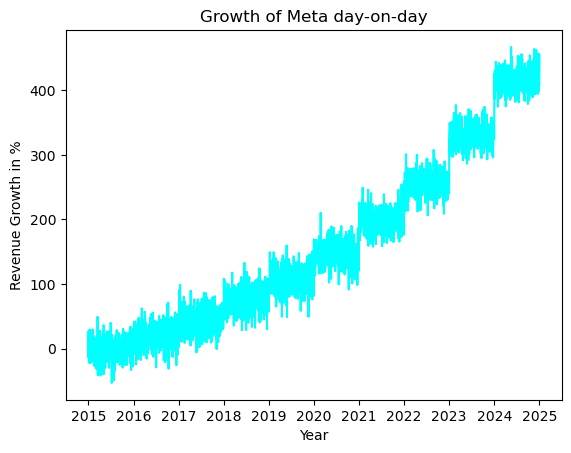

In [91]:
#Day on day growth for meta
growth_meta = df.groupby('Date')['AI_Revenue_Growth_%'].mean()
plt.title("Growth of Meta day-on-day")
plt.xlabel("Year")
plt.ylabel("Revenue Growth in %")
plt.plot(growth_meta, color =  'cyan')
plt.show()

### Corelation between columns

In [92]:
df.corr(numeric_only = True)

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%,Year
R&D_Spending_USD_Mn,1.000000,0.935030,0.291245,-0.004628,0.297701
AI_Revenue_USD_Mn,0.935030,1.000000,0.530128,-0.000017,0.526478
AI_Revenue_Growth_%,0.291245,0.530128,1.000000,0.020937,0.952199
Stock_Impact_%,-0.004628,-0.000017,0.020937,1.000000,0.016525
Year,0.297701,0.526478,0.952199,0.016525,1.000000


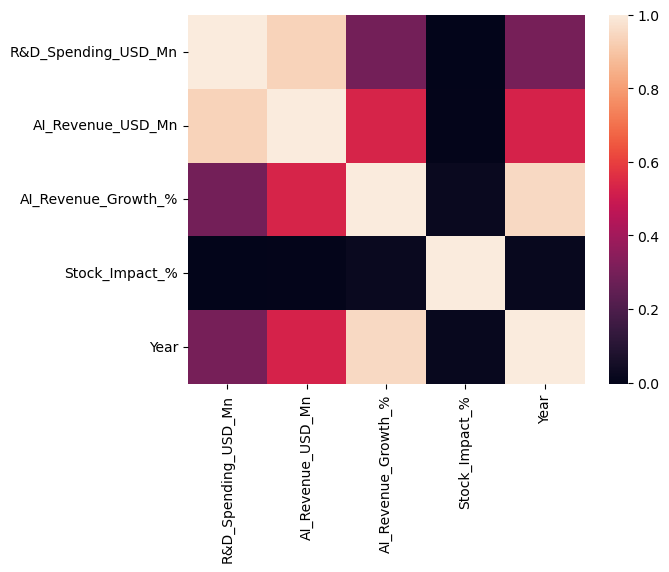

In [93]:
sns.heatmap(df.corr(numeric_only = True))
plt.show()

### Expenditure vs Revenue Year-by-Year

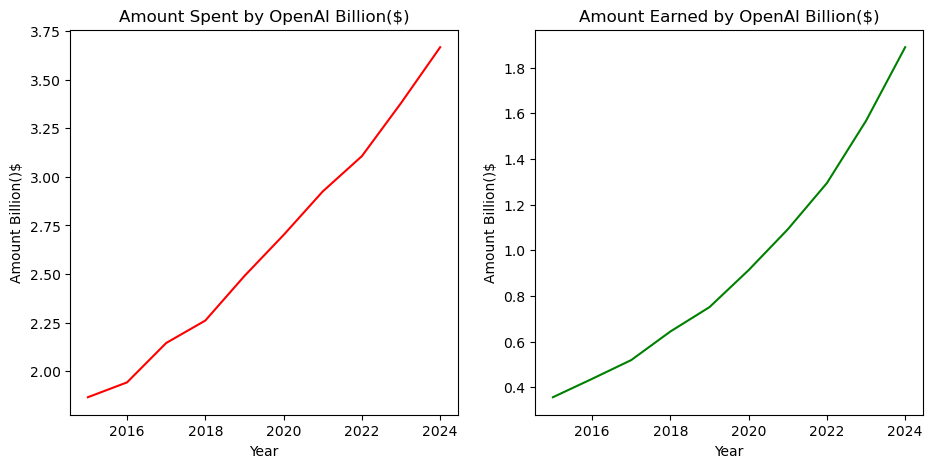

In [94]:
#openai
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
spend_openai = data_openai.groupby('Year')['R&D_Spending_USD_Mn'].sum()/1000
plt.plot(spend_openai, color = 'r')
plt.title("Amount Spent by OpenAI Billion($)")
plt.xlabel("Year")
plt.ylabel("Amount Billion()$")

plt.subplot(1,2,2)
earned_openai = data_openai.groupby('Year')['AI_Revenue_USD_Mn'].sum()/1000
plt.plot(earned_openai, color = 'g')
plt.title("Amount Earned by OpenAI Billion($)")
plt.xlabel("Year")
plt.ylabel("Amount Billion()$")

plt.show()

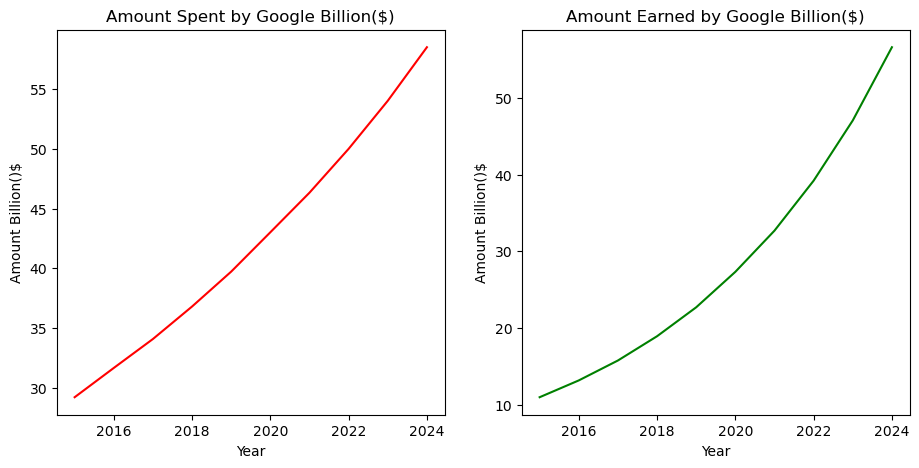

In [95]:
#Google
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
spend_google = data_google.groupby('Year')['R&D_Spending_USD_Mn'].sum()/1000
plt.plot(spend_google, color = 'r')
plt.title("Amount Spent by Google Billion($)")
plt.xlabel("Year")
plt.ylabel("Amount Billion()$")

plt.subplot(1,2,2)
earned_google = data_google.groupby('Year')['AI_Revenue_USD_Mn'].sum()/1000
plt.plot(earned_google, color = 'g')
plt.title("Amount Earned by Google Billion($)")
plt.xlabel("Year")
plt.ylabel("Amount Billion()$")

plt.show()

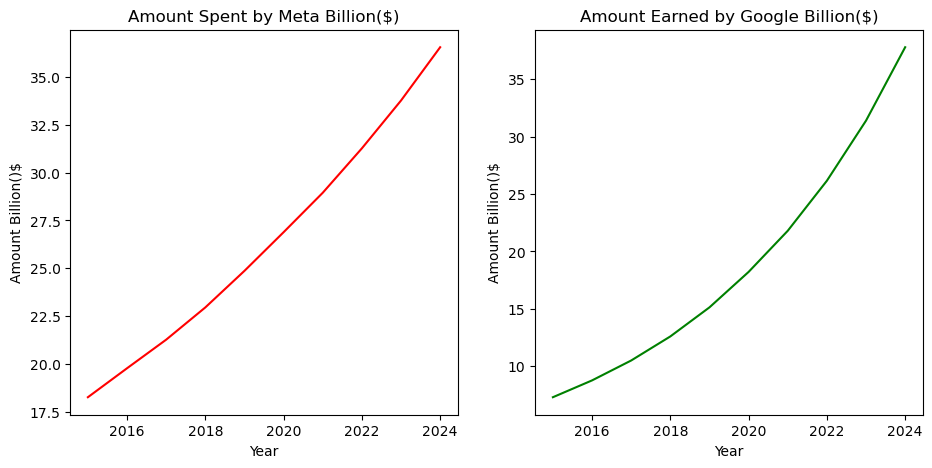

In [96]:
#Google
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
spend_meta = data_meta.groupby('Year')['R&D_Spending_USD_Mn'].sum()/1000
plt.plot(spend_meta, color = 'r')
plt.title("Amount Spent by Meta Billion($)")
plt.xlabel("Year")
plt.ylabel("Amount Billion()$")

plt.subplot(1,2,2)
earned_meta = data_meta.groupby('Year')['AI_Revenue_USD_Mn'].sum()/1000
plt.plot(earned_meta, color = 'g')
plt.title("Amount Earned by Google Billion($)")
plt.xlabel("Year")
plt.ylabel("Amount Billion()$")

plt.show()

### Combined Graph of Spending and Earning

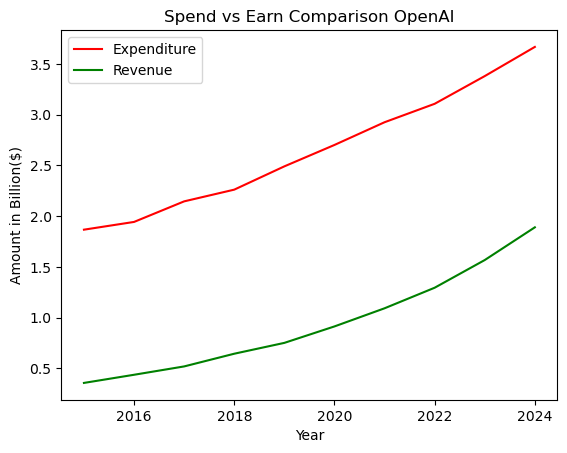

In [97]:
#Openai
plt.plot(spend_openai, color = 'r',label = 'Expenditure')
plt.plot(earned_openai, color = 'g',label = 'Revenue')
plt.title("Spend vs Earn Comparison OpenAI")
plt.xlabel("Year")
plt.ylabel("Amount in Billion($)")
plt.legend()
plt.show()

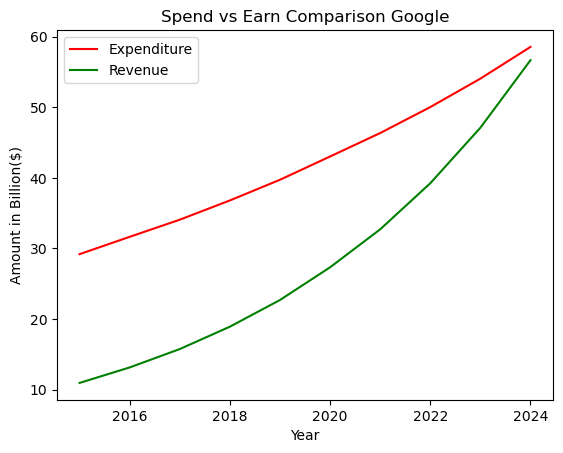

In [98]:
#Google
plt.plot(spend_google, color = 'r',label = 'Expenditure')
plt.plot(earned_google, color = 'g',label = 'Revenue')
plt.title("Spend vs Earn Comparison Google")
plt.xlabel("Year")
plt.ylabel("Amount in Billion($)")
plt.legend()
plt.show()

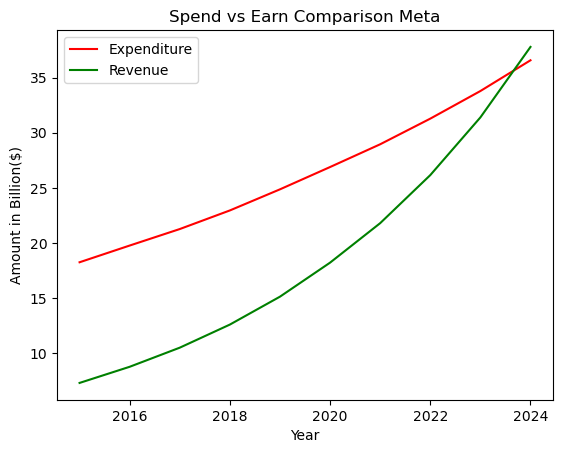

In [99]:
#Meta
plt.plot(spend_meta, color = 'r',label = 'Expenditure')
plt.plot(earned_meta, color = 'g',label = 'Revenue')
plt.title("Spend vs Earn Comparison Meta")
plt.xlabel("Year")
plt.ylabel("Amount in Billion($)")
plt.legend()
plt.show()

### Pairplot to show relations between columns


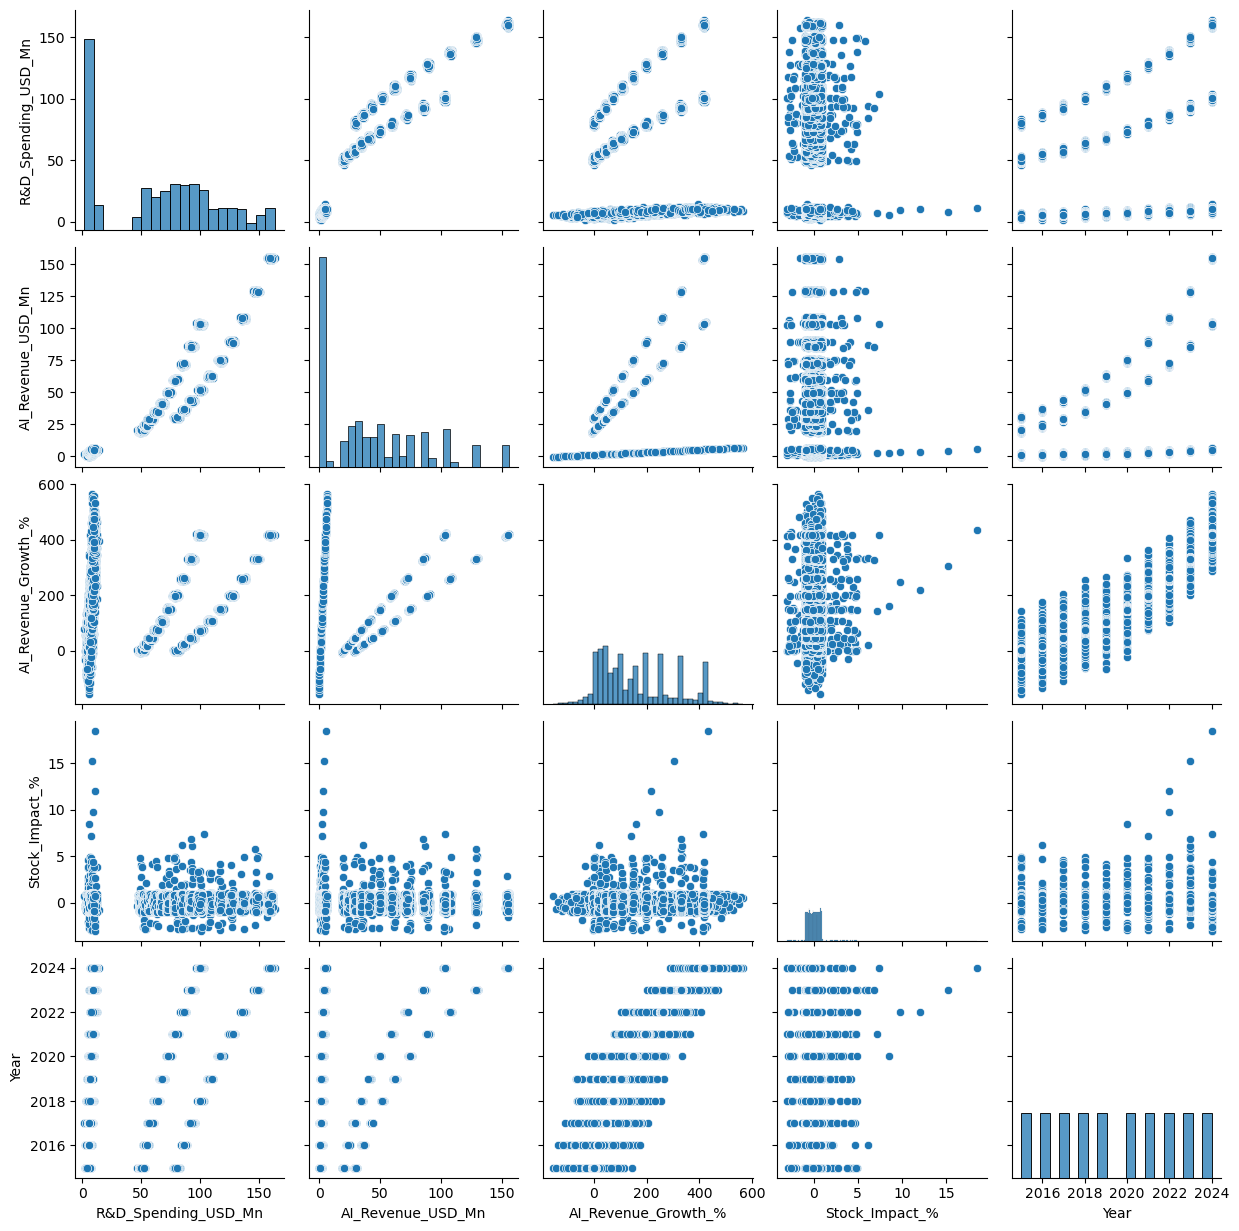

In [100]:
sns.pairplot(df);


### Marking changes of particular Event

In [101]:
events = df['Event'].value_counts()
events

Event
AI speech recognition release      37
AI Ads Optimization upgrade        32
AI partnership deal                32
AI-powered search update           32
AI Video Recommendation upgrade    29
AI ethics policy update            27
Cloud AI launch                    27
GPT-1 release                       1
GPT-2 release                       1
GPT-3 release                       1
Codex release                       1
DALL·E 2 release                    1
ChatGPT (GPT-3.5) launch            1
GPT-4 release                       1
GPT-5 release (predicted)           1
TensorFlow open-source release      1
AlphaGo beats Lee Sedol             1
BERT for Search launch              1
MUM Search Model launch             1
Bard chatbot launch                 1
Gemini AI release                   1
LLaMA 1 release                     1
LLaMA 2 release                     1
LLaMA 3 release (predicted)         1
Name: count, dtype: int64

### Comparing Stock change before and after Gpt 4 release 

In [102]:
stock_change = df [df [ 'Event' ] == "GPT-4 release" ] 
stock_change

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.2,2023


In [103]:
date_bef_af = df.loc[2984:3005]
date_bef_af

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
2984,2023-03-04,OpenAI,10.59,4.26,326.43,NaN,-0.28,2023
2985,2023-03-05,OpenAI,8.24,3.58,257.92,NaN,-0.48,2023
2986,2023-03-06,OpenAI,9.32,4.21,320.60,NaN,0.89,2023
2987,2023-03-07,OpenAI,8.52,4.13,313.16,NaN,-0.08,2023
2988,2023-03-08,OpenAI,8.90,3.63,263.03,NaN,-0.56,2023
2989,2023-03-09,OpenAI,8.44,4.64,363.84,NaN,0.91,2023
2990,2023-03-10,OpenAI,9.55,4.83,383.49,NaN,-0.02,2023
2991,2023-03-11,OpenAI,8.34,3.95,294.67,NaN,0.19,2023
2992,2023-03-12,OpenAI,8.71,3.57,256.88,NaN,-0.87,2023
2993,2023-03-13,OpenAI,10.61,5.19,419.06,NaN,0.53,2023


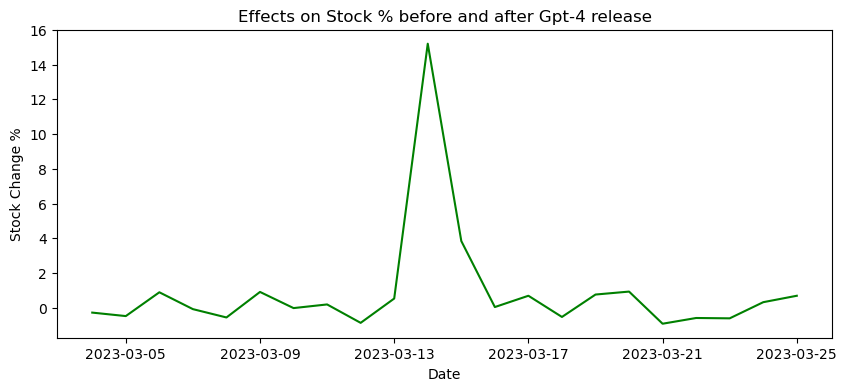

In [104]:
plt.figure(figsize = (10,4))
plt.plot(date_bef_af['Date'], date_bef_af ['Stock_Impact_%'], color = 'g')
plt.title("Effects on Stock % before and after Gpt-4 release")
plt.xlabel("Date")
plt.ylabel("Stock Change %")
plt.show()

##### Daily Average stock changes in % by companies

In [105]:
df.groupby('Company')['Stock_Impact_%'].mean()*100

Company
Google    2.620860
Meta      0.976184
OpenAI    4.070901
Name: Stock_Impact_%, dtype: float64

##### Daily Average expenditure on R&D % by companies

In [106]:
df.groupby('Company')['R&D_Spending_USD_Mn'].mean()

Company
Google    115.888623
Meta       72.415294
OpenAI      7.249595
Name: R&D_Spending_USD_Mn, dtype: float64

##### Maximum impact on stocks by company

In [108]:
df.groupby('Company')['Stock_Impact_%'].max()

Company
Google     6.2
Meta       7.4
OpenAI    18.5
Name: Stock_Impact_%, dtype: float64

##### Change in stock % year by year

In [113]:
stock = df.groupby(['Year','Company'])['Stock_Impact_%'].max()
stock

Year  Company
2015  Google      4.96
      Meta        4.80
      OpenAI      3.92
2016  Google      6.20
      Meta        2.14
      OpenAI      4.66
2017  Google      4.42
      Meta        4.21
      OpenAI      4.63
2018  Google      1.97
      Meta        4.54
      OpenAI      4.94
2019  Google      3.20
      Meta        1.86
      OpenAI      4.20
2020  Google      4.18
      Meta        4.86
      OpenAI      8.50
2021  Google      4.10
      Meta        4.80
      OpenAI      7.20
2022  Google      4.88
      Meta        3.98
      OpenAI     12.00
2023  Google      5.80
      Meta        6.80
      OpenAI     15.20
2024  Google      2.89
      Meta        7.40
      OpenAI     18.50
Name: Stock_Impact_%, dtype: float64

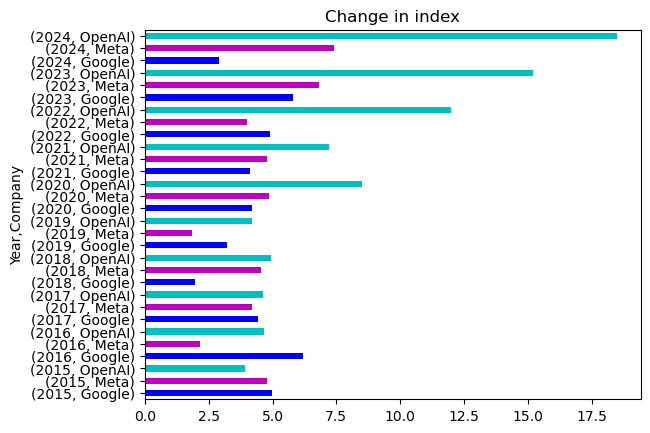

In [115]:
stock.plot(kind = 'barh', color = ['b','m','c'])
plt.title("Change in index")
plt.show()